In [68]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [69]:
im=imageio.imread('./ChestImages/chest-220.dcm')

In [70]:
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Image'>
Shape of image array: (512, 512)


In [17]:
im.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286'),
      ('StudyDate', '20040529'),
      ('SeriesDate', '20040515'),
      ('ContentDate', '20040515'),
      ('StudyTime', '115208'),
      ('SeriesTime', '115254'),
      ('ContentTime', '115325'),
      ('Modality', 'CT'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('StudyDescription', 'PET CT with registered MR'),
      ('SeriesDescription', 'CT IMAGES - RESEARCH'),
      ('PatientName', 'STS_007'),
      ('PatientID', 'STS_007'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientWeight', 82.0),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'),
      ('SeriesNumber', 2),
      ('AcquisitionNumber'

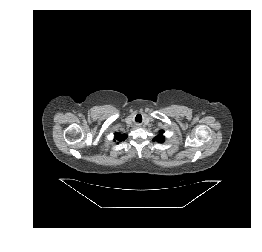

In [55]:
#plt.imshow(im,cmap='gray')
plt.imshow(im,cmap='gray',vmin=-200,vmax=200)
plt.axis('off')
plt.show()

In [19]:
im1=imageio.imread('./ChestImages/chest-220.dcm')
im2=imageio.imread('./ChestImages/chest-221.dcm')
im3=imageio.imread('./ChestImages/chest-222.dcm')
print(im1.shape)
vol=np.stack([im1,im2,im3])
print(vol.shape)

(512, 512)
(3, 512, 512)


In [20]:
#vol = imageio.volread('./ChestImages')

#fig, axes = plt.subplots(nrows=1, ncols=3)
#axes[0].imshow(vol[0],cmap='gray')
#axes[1].imshow(vol[10],cmap='gray')
#axes[2].imshow(vol[20],cmap='gray')

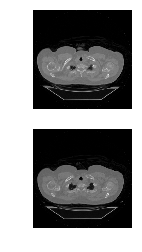

In [21]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2,ncols=1)
axes[0].imshow(im1,cmap='gray')
axes[1].imshow(im2,cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.show()

In [22]:
#fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
#for ii in range(4):
    #im = vol[ii*40, :, :]
    #axes[ii].imshow(im, cmap='gray')
    #axes[ii].axis('off')

# Render the figure
#plt.show()

In [23]:
# Select frame from "vol"
#im1 = vol[:, 256, :]
#im2 = vol[:, :, 256]

# Compute aspect ratios
#d0, d1, d2 = vol.meta['sampling']
#asp1 = d0 / d2
#asp2 = d0 / d1

# Plot the images on a subplots array 
#fig, axes = plt.subplots(nrows=2, ncols=1)
#axes[0].imshow(im1, cmap='gray', aspect=asp1)
#axes[1].imshow(im2, cmap='gray', aspect=asp2)
#plt.show()

In [24]:
im=imageio.imread('./ChestImages/chest-220.dcm')
im.dtype

dtype('int16')

(256,)


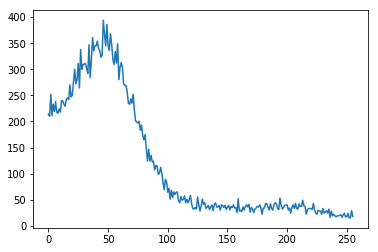

In [30]:
import scipy.ndimage as ndi
hist = ndi.histogram(im, min=0,
max=255,
bins=256)
print(hist.shape)
plt.plot(hist)
plt.show()

In [48]:
#hist = ndi.histogram(im, min=0,
#max=255,
#bins=256)
#cdf = hist.cumsum() / hist.sum()
#print(im.shape)
#im_equalized = cdf[im]
#fig, axes = plt.subplots(2, 1)
#axes[0].imshow(im)
#axes[1].imshow(im_equalized)
#plt.show()

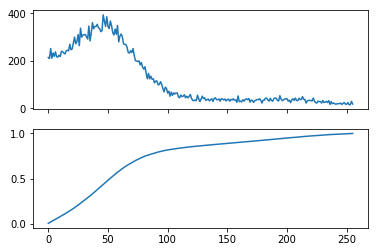

In [49]:
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0,
max=255,
bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
plt.show()

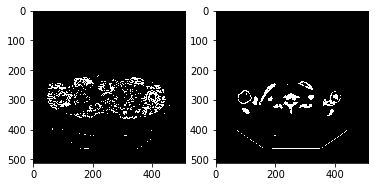

In [73]:
mask_bone = im >= 145
mask_skin = (im >= 50) & (im < 145)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap='gray')
axes[1].imshow(mask_bone, cmap='gray')
plt.show()

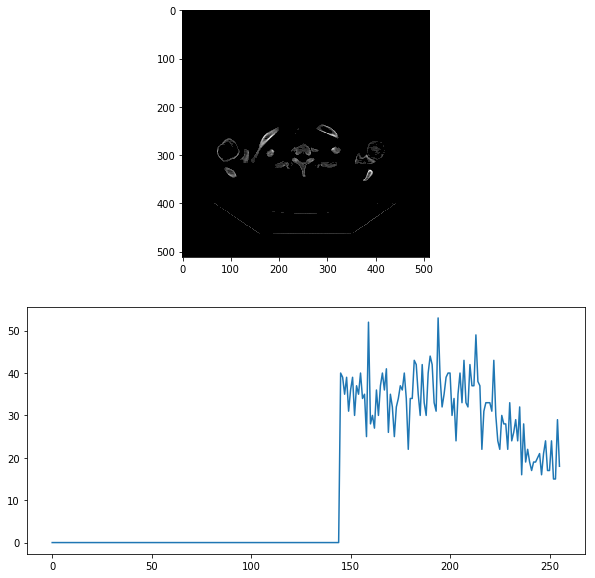

In [81]:
mask_bone = im>=145
im_bone = np.where(mask_bone, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone, min=1,
max=255,
bins=256)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1,figsize=(10,10))

axes[0].imshow(im_bone,cmap='gray')
axes[1].plot(hist)
plt.show()

### binary_dilation: Add pixels along edges
### binary_erosion: Remove pixels along edges
### binary_opening: Erode then dilate, "opening" areas near edges
### binary_closing: Dilate then erode, "filling in" holes

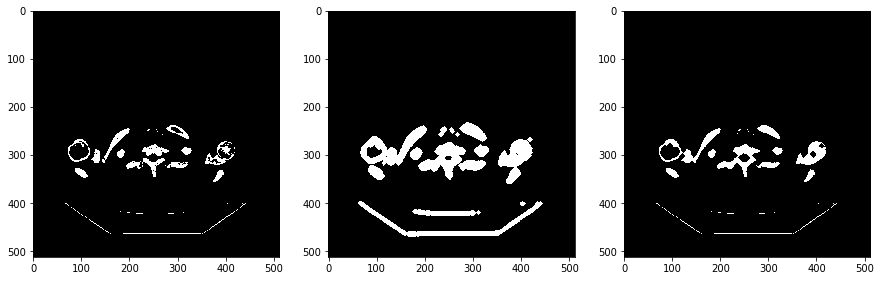

In [89]:
mask_bone = im>=145
mask_dilate = ndi.binary_dilation(mask_bone,iterations = 5)
mask_closed = ndi.binary_closing(mask_bone,iterations = 5)

# Plot masked images
fig, axes = plt.subplots(1,3,figsize=(15,15))
axes[0].imshow(mask_bone,cmap='gray')
axes[1].imshow(mask_dilate,cmap='gray')
axes[2].imshow(mask_closed,cmap='gray')
plt.show()

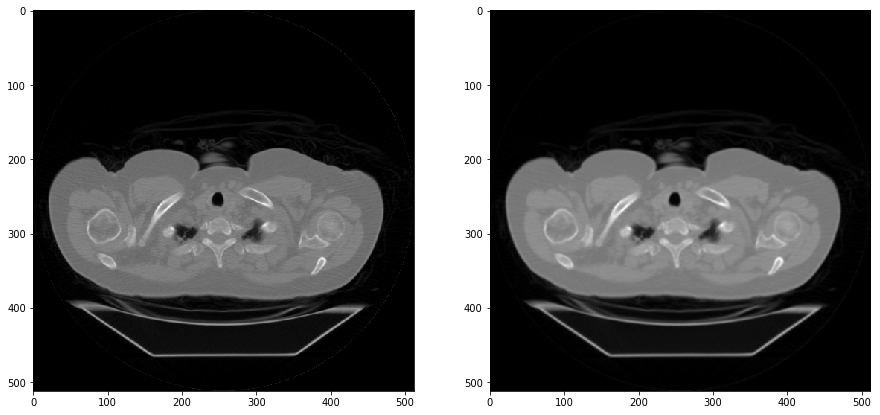

In [99]:
#Sharpening Filters
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

im_filt = ndi.convolve(im,weights)

fig, axes = plt.subplots(1,2,figsize=(15,15
                                 ))
axes[0].imshow(im,cmap='gray')
axes[1].imshow(im_filt,cmap='gray')

In [ ]:
#Smoothing can improve the signal-to-noise ratio of your image by blurring out small variations in intensity.
#The Gaussian filter is excellent for this: it is a circular (or spherical) smoothing kernel that weights nearby pixels
#higher than distant ones

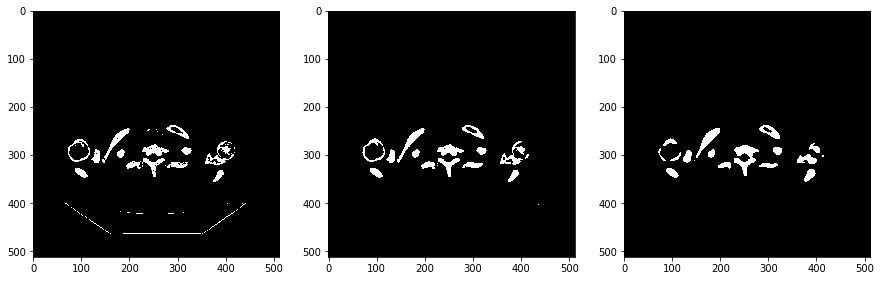

In [101]:
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3,figsize=(15,15))
axes[0].imshow(im >= 145,cmap='gray')
axes[1].imshow(im_s1 >= 145,cmap='gray')
axes[2].imshow(im_s3 >= 145,cmap='gray')
plt.show()

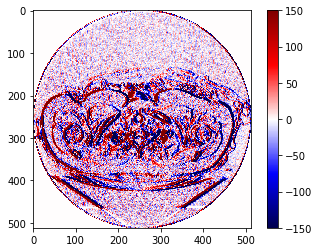

In [102]:
weights = [[1, 0, -1], [1, 0, -1], [1, 0 ,-1]]
edges = ndi.convolve(im, weights)
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()
plt.show()

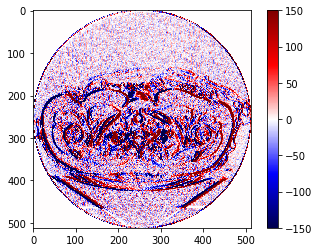

In [108]:
weights = [[-1, 0, 1], [-1,0, 1], [-1, 0 ,1]]
edges = ndi.convolve(im, weights)
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()
plt.show()

C:\Users\Sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


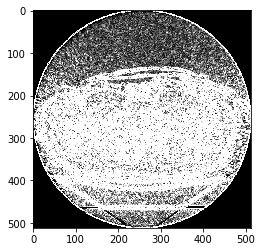

In [109]:
sobel_ax0 = ndi.sobel(im, axis=0)
sobel_ax1 = ndi.sobel(im, axis=1)

# Calculate edge magnitude 
edges=np.sqrt(np.square(sobel_ax0) +
np.square(sobel_ax1))

# Plot edge magnitude
plt.imshow(edges, cmap='gray', vmax=75)

In [ ]:
#Labelling and Object Detection

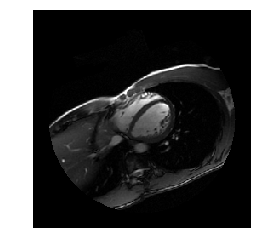

In [112]:
im=imageio.imread('./SunnyBrook/SCD2001_006/SCD2001_MR_117.dcm')
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.show()

In [113]:
im_filt = ndi.median_filter(im, size=3)

mask_start = np.where(im_filt > 60, 1, 0)
mask = ndi.binary_closing(mask_start)

labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)

Num. Labels: 26


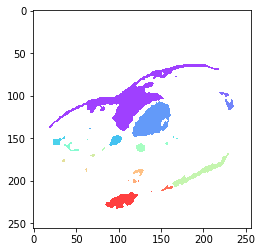

In [114]:
overlay = np.where(labels > 0, labels, np.nan)
plt.imshow(overlay, cmap='rainbow', alpha=0.75)
plt.show()

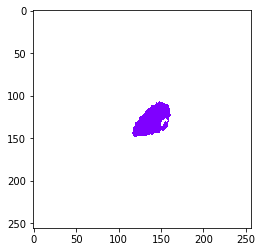

In [125]:
labels, nlabels = ndi.label(mask)

lv_val = labels[128,128]
lv_mask = np.where(labels == lv_val, 1, np.nan)

plt.imshow(lv_mask, cmap='rainbow')
plt.show()

In [118]:
labels.shape

(256, 256)

In [130]:
labels, nlabels = ndi.label(mask)
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, 0)

# Find bounding box of left ventricle
bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes))
print('Indices for first box:', bboxes[0])

Number of objects: 1
Indices for first box: (slice(107, 149, None), slice(116, 162, None))


In [134]:
bboxes

[(slice(107, 149, None), slice(116, 162, None))]

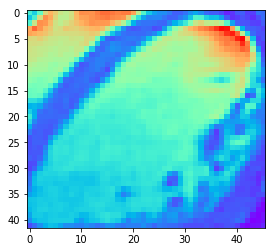

In [138]:
im_lv = im[bboxes[0]]
plt.imshow(im_lv,cmap='rainbow')

In [139]:
#measuring intensity

In [144]:
vol=imageio.volread('./SunnyBrook/SCD2001_006/SCD2001_MR_117.dcm')

Reading DICOM (examining files): 1/21 files (4.8%21/21 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 21/21  (100.0%)


In [162]:
hist=ndi.histogram(vol, min=0, max=255, bins=256)
obj_hists=ndi.histogram(vol, 0, 255, 256, 
                        labels, index=[1, 2])

In [163]:
len(obj_hists)

2

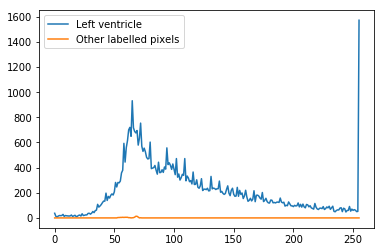

In [164]:
plt.plot(obj_hists[0], 
    label='Left ventricle')
plt.plot(obj_hists[1], 
    label='Other labelled pixels')
plt.legend()
plt.show()

In [148]:
var_all = ndi.variance(vol, labels=None, index=None)
print('All pixels:', var_all)

# Variance for labeled pixels
var_labels = ndi.variance(vol, labels, index=None)
print('Labeled pixels:', var_labels)

# Variance for each object
var_objects = ndi.variance(vol, labels, index=[1,2])
print('Left ventricle:', var_objects[0])
print('Other tissue:', var_objects[1])

All pixels: 1024.52680172
Labeled pixels: 2365.56630917
Left ventricle: 3246.3323688
Other tissue: 32.2176870748


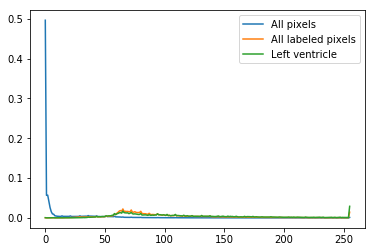

In [154]:
hist1 = ndi.histogram(vol, min=0, max=255, bins=256)
hist2 = ndi.histogram(vol, 0, 255, 256, labels=labels)
hist3 = ndi.histogram(vol, 0, 255, 256, labels=labels, index=1)

plt.plot(hist1 / hist1.sum(), label='All pixels')
plt.plot(hist2 / hist2.sum(), label='All labeled pixels')
plt.plot(hist3 / hist3.sum(), label='Left ventricle')
plt.legend()
plt.show()

In [165]:
#Measuring Morphology

In [173]:
vol=imageio.volread('./SunnyBrook/SCD2001_006/SCD2001_MR_117.dcm')
d0, d1, d2 = vol.meta['sampling']
dvoxel = d0 * d1 * d2
# Count label voxels
nvoxels=ndi.sum(1, labels, index=1)
# Calculate volume of label
volume = nvoxels * dvoxel

Reading DICOM (examining files): 1/21 files (4.8%21/21 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 21/21  (100.0%)


In [174]:
volume

0.0

In [176]:
#A distance transformation calculates the distance from each pixel to a given point, usually the nearest background pixel. 
#This allows you to determine which points in the object are more interior and which are closer to edges

In [177]:
#lv = np.where(labels == 1, 1, 0)
#dists = ndi.distance_transform_edt(lv, sampling=vol.meta['sampling'])

#print('Max distance (mm):', ndi.maximum(dists))
#print('Max location:', ndi.maximum_position(dists))

# Plot overlay of distances
#overlay = np.where(dists[5] > 0, dists[5], np.nan) 
#plt.imshow(overlay, cmap='hot')

In [ ]:
#The distance transformation reveals the most embedded portions of an object. On the other hand, ndi.center_of_mass() returns the coordinates for the center of an object.
#The "mass" corresponds to intensity values, with higher values pulling the center closer to it

Label 1 center: (10.201159291570955, 102.06803987032858, 114.83614409191652)
Label 2 center: (10.10105580693816, 77.541478129713425, 167.50150829562594)


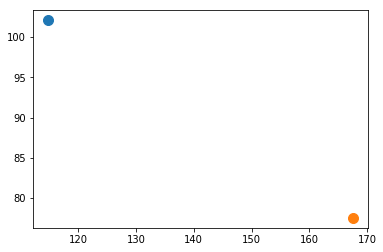

In [178]:
coms = ndi.center_of_mass(vol, labels, index=[1,2])
print('Label 1 center:', coms[0])
print('Label 2 center:', coms[1])

for c0, c1, c2 in coms:
    plt.scatter(c2, c1, s=100, marker='o')
plt.show()

In [179]:
#ts = np.zeros(20)

#d0, d1, d2, d3 = vol_ts.meta['sampling']
#dvoxel = d1 * d2 * d3

#for t in range(20):
    #nvoxels = ndi.sum(1, labels[t], index=1)
    #ts[t] = nvoxels * dvoxel

# Plot the data
#plt.plot(ts)
#format_and_render_plot()

In [180]:
#The ejection fraction is defined as:
#Vmax−Vmin/Vmax
#where V is left ventricle volume for one 3D timepoint.

In [181]:
#tmax = np.argmax(ts)
#tmin = np.argmin(ts)

# Plot the largest and smallest volumes
#fig, axes = plt.subplots(2,1)
#axes[0].imshow(vol_ts[tmax, 4], vmax=160)
#axes[1].imshow(vol_ts[tmin, 4], vmax=160)
#format_and_render_plots()

In [182]:
#ej_vol = ts.max() - ts.min()
#ej_frac = ej_vol / ts.max()
#print('Est. ejection volume (mm^3):', ej_vol)
#print('Est. ejection fraction:', ej_frac)

In [183]:
#spatial transformation

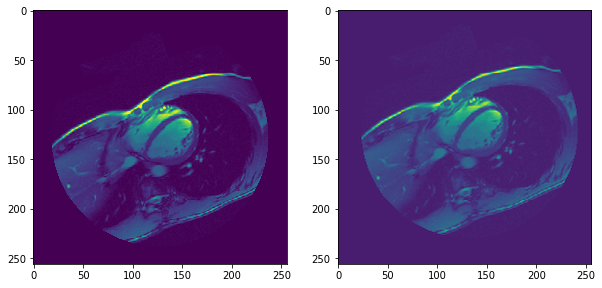

In [191]:
#translation

com = ndi.center_of_mass(im)

# Calculate amount of shift needed
d0 = 128 - com[0]
d1 = 128 - com[1]

# Translate the brain towards the center
xfm = ndi.shift(im, shift=(d0, d1))

# Plot the original and adjusted images
#plt.Figure(figsize=(10,10))
fig, axes = plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(im)
axes[1].imshow(xfm)
plt.show()


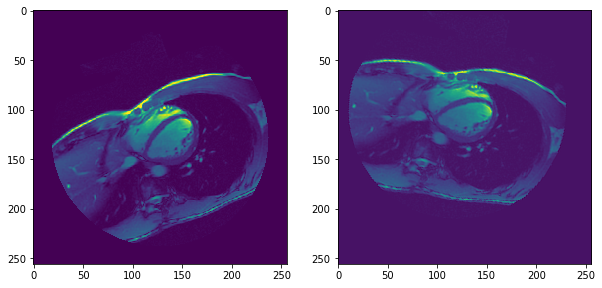

In [193]:
#rotation
xfm = ndi.shift(im, shift=(-20, -20))

# Rotate the shifted image
xfm = ndi.rotate(xfm, angle=-30, reshape=False)

# Plot the original and transformed images
fig, axes = plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(im)
axes[1].imshow(xfm)
plt.show()

In [194]:
#resampling and interpolation
#Images can be collected in a variety of shapes and sizes. Resampling is a useful tool when these shapes need to be made consistent. Two common applications are:

#Downsampling: combining pixel data to decrease size
#Upsampling: distributing pixel data to increase size

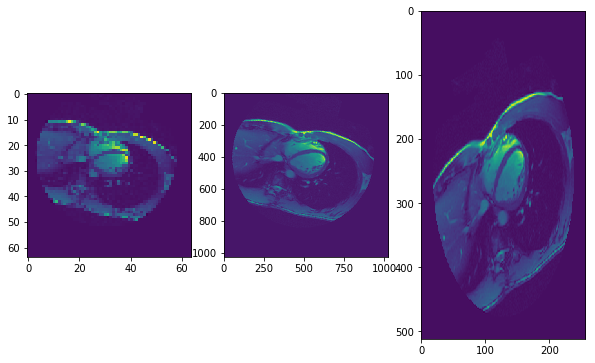

In [197]:
# Center and level image
xfm = ndi.shift(im, shift=(-20, -20))
xfm = ndi.rotate(xfm, angle=-35, reshape=False)

# Resample image
im_dn = ndi.zoom(xfm, zoom=0.25)
im_up = ndi.zoom(xfm, zoom=4.00)
random_zoom=ndi.zoom(im, zoom=(2,1))
fig, axes = plt.subplots(1,3,figsize=(10,10))
axes[0].imshow(im_dn)
axes[1].imshow(im_up)
axes[2].imshow(random_zoom)

In [199]:
#interpolation

#Interpolation is how new pixel intensities are estimated when an image transformation is applied.
#It is implemented in SciPy using sets of spline functions.

#Editing the interpolation order when using a function such as ndi.zoom() modifies
#the resulting estimate: higher orders provide more flexible estimates but take longer to compute.

Original shape: (256, 256)
Upsampled shape: (1024, 1024)


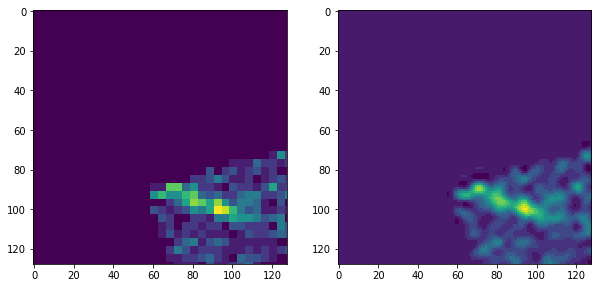

In [200]:
up0 = ndi.zoom(im, zoom=4, order=0)
up5 = ndi.zoom(im, zoom=4, order=5)

print('Original shape:', im.shape)
print('Upsampled shape:', up0.shape)


fig, axes = plt.subplots(1, 2,figsize=(10,10))
axes[0].imshow(up0[128:256, 128:256])
axes[1].imshow(up5[128:256, 128:256])
plt.show()

In [201]:
#comapring images

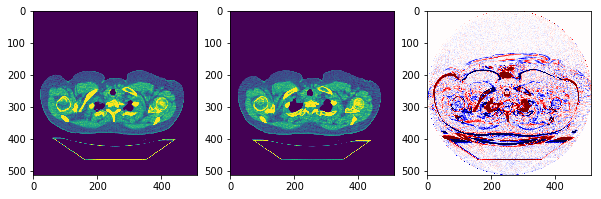

In [204]:
im1=imageio.imread('./ChestImages/chest-220.dcm')
im2=imageio.imread('./ChestImages/chest-221.dcm')
err=im1-im2
fig, axes = plt.subplots(1,3,figsize=(10,10))
axes[0].imshow(im1,vmin=-200, vmax=200)
axes[1].imshow(im2,vmin=-200, vmax=200)
axes[2].imshow(err,cmap='seismic',vmin=-200, vmax=200)

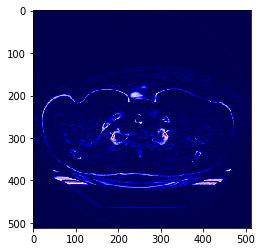

In [208]:
abs_err = np.abs(im1 - im2)
plt.imshow(abs_err, cmap='seismic')

In [209]:
mean_abs_err = np.mean(np.abs(im1 - im2))
print('MAE:', mean_abs_err)

MAE: 37.2115974426


In [210]:
#Another cost function is the intersection of the union (IOU). 
#The IOU is the number of pixels filled in both images (the intersection) 
#out of the number of pixels filled in either image (the union).

In [211]:
def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    return i.sum() / u.sum()

In [212]:
xfm = ndi.shift(im1, (-5, -5))
xfm = ndi.rotate(xfm, -30, reshape=False)
iou = intersection_of_union(xfm, im2)

In [213]:
iou

0.84148346513162664

In [215]:
#normalizing measurement

In [216]:
#from scipy.stats import ttest_ind

#brain_alz = df.loc[df.alzheimers == True, 'brain_vol']
#brain_typ = df.loc[df.alzheimers == False, 'brain_vol']

# Perform t-test of "alz" > "typ"
#results = ttest_ind(brain_alz, brain_typ)
#print('t = ', results.statistic)
#print('p = ', results.pvalue)

In [217]:
#from scipy.stats import ttest_ind
#df['adj_brain_vol'] = df.brain_vol / df.skull_vol

#brain_alz = df.loc[df.alzheimers == True, 'adj_brain_vol']
#brain_typ = df.loc[df.alzheimers == False, 'adj_brain_vol']

#results = ttest_ind(brain_alz, brain_typ)